# HW #2: Neural Networks

This assignment contains 3 experiments that use a neural network trained on the MNIST data to recognize
handwritten images.  This neural network returns a set of weights that is in essense the model that would
be used in a production system to recognize 28 x 28 pixel images of handwritten images.

There are three layers in this network.  The input layer, which contains 784 nodes (plus a bias node),
represents each 28 x 28 pixel image of the MNIST data that is passed thru during training.
From the input layer, there is a middle "hidden layer" that is a set of abstractions from the input layer.
The last layer is the output layer of 10 nodes, representing the digit 0-9, one of which will contain a
highest activation probaility (between 0 and 1).  In addition to the layers, we have the weights
defined below as well as a few other symbols worth mentioning.

     xᵢ      Input layer vector of 784 (+1 bias) pixels of a single image (i is the indexer)
     hⱼ      Hidden layer vector of varying length (+1 bias) (j is the indexer)
     oₖ      Output layer vector of representing activation level of a digit (k is the indexer)

     wᵢ      Weight matrix from the input layer to the hidden layer (i is the indexer)
     wⱼ      Weight matrix from hidden layer to output layer (j is the indexer)
     Δwⱼᵢ    Delta or difference in weight from the input layer to the hidden layer
     Δwₖⱼ    Delta or difference in weight from the hidden layer to the output layer

     δⱼ      The hidden layer error term that the network attempts to minimize
     δₖ      The output layer error term that the network attempts to minimize

     η       The learning rate
     α       The momentum (described below)
     tₖ      The target matrix tₖ for calculating output error term δₖ
     σ       The sigmoid function

UPDATE:
The Backpropagation algorithm that implements stochastic gradient descent involes the
following:
http://web.cecs.pdx.edu/~doliotis/MachineLearningSummer2020/lectures/lecture04/NeuralNetworksML.pdf
(pages 38-40)

1. Propagating the input forward
2. Calculating the error terms for both the hidden and output vectors:

        δₖ ⟵ oₖ(1 - oₖ)(tₖ - oₖ)
        δⱼ ⟵ hⱼ(1 - hⱼ)(   ∑    wₖⱼ δₖ)
                      ᵏ ∊ ᵒᵘᵗᵖᵘᵗˢ

3. Updating the weights:
To avoid oscillations, momentum (α) is introduced, in which change in weight is dependent on past weight
change.
http://web.cecs.pdx.edu/~doliotis/MachineLearningSummer2020/lectures/lecture04/NeuralNetworksML.pdf (page 44)

        Δwⱼ,ᵢ = ηδⱼxᵢ + αΔw'ⱼ,ᵢ
        Δwₖ,ⱼ = ηδₖxᵢ + αΔw'ⱼ,ᵢ

**NOTE:** *I run experiment 2 last, because it calls for reducing the number of samples of my
training data.*


and now few notes on my implementation...

## Static Parameters
Here are the parameters that actually will remain static for all of our experiments.
In fact, aside from the filenames for the training and validation samples, they are the
the default parameter values for training.

In [2]:
train_file = 'mnist_train.csv'
test_file = 'mnist_validation.csv'
epochs = 50

# train_file = 'mnist_train_6k.csv'
# test_file = 'mnist_validation_1k.csv'
# epochs = 10

bias = 1
rate = 0.1
target = 0.9
initial_weight = 0.05

## Parameters
Here are the the parameters that will actually change during the experiments:

In [3]:
input_size = 784 + bias
hidden_size = 20
output_size = 10
sizes = [input_size, hidden_size, output_size]

momentum = 0.9

Missing from the code above, is the size of the training samples. We will show that later.

### Hidden Input Size
This is number of nodes in the hidden layer.  Conceptually, this represents the number of
intermediate things (or abstractions) that this network will learn about hand written digits.
We could have more than one hidden layer, but we don't do that in any of these experiments.

### Momentum α ###
In plain English, momentum in machine learning helps you from getting stuck in a local minima,
instead of reaching the global minima (OK, maybe that wasn't that plain of English). I really
like this photo I found in an answer on Quora:
https://www.quora.com/What-does-momentum-mean-in-neural-networks

In this case, a picture truly is a thousand words.

<img style="border: 1px solid"  width="35%" height="35%" src="https://qph.fs.quoracdn.net/main-qimg-834da2a61df256c91ba57827da985638">

### Training Size
Experiment 3 involves varying the number of training samples. I simply do this by slicing off a 1/2 of
the samples, and then another 1/4 of them.  More on that below.

## Initializing our Neural Network
First we instantiate our neural network.  The constructor optionally takes in the training and testing filenames
and the bias.  The default for the bias is 1.  Since I have never really seen the bias ever change, I
decided to keep this parameter at the constructor level during initialization. However, I have moved
several parameters from the constructor to the train method, because one might want to vary these
parameters during several trainings.

I do require a that you specify the number and size of each layer durning initialization. However, I do
allow you to resize these layers by providing a resize function.

Below demonstrates initializing our neural network.

In [4]:
import network as nn

n = nn.Network(sizes=sizes, train_filename=train_file, test_filename=test_file, bias=bias)

Loading Data: mnist_train.csv
Loading Data: mnist_validation.csv


# Experiment 1: Hidden Layer Size

1. How does the number of hidden units affect the final accuracy on the test data?

    ***The accuracy increased from 93% (20 units), to 95% (50 units), and finally 96.6% (100 units).
    That 3% doesn't seem significant, but we are looking to get to close to 100% as possible.***

2. How does it affect the number of epochs needed for training to converge?

    ***It appears that when you increase the number of hidden units, you converge a little quicker.
    However, I am already jumping from about 10% accuracy to 91% on the second epoch with 20 hidden units.***

3. Is there evidence that any of your networks has overfit to the training data?  If so, what is that evidence?

    ***No.  I don't see any direct evidence.  What I do see is a massive jump in accuracy after the first
    epoch, and then the remaining 48 epochs bring about very small improvements in accuracy.
    If resources were scarce, one might make the argument to run only 2 epochs.***

4. How do your results compare to the results obtained by your perceptron in Assignment 1?

    ***On Assignment 1, my results topped out at 88.5%. On experiment 1, my best result was with
    100 hidden units with an accuracy of 96.6%.***

### Train with a hidden layer size of 20 nodes
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

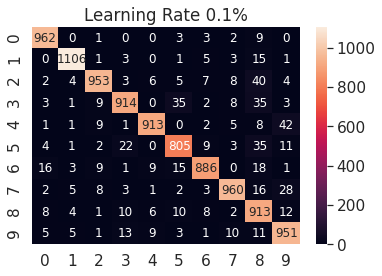

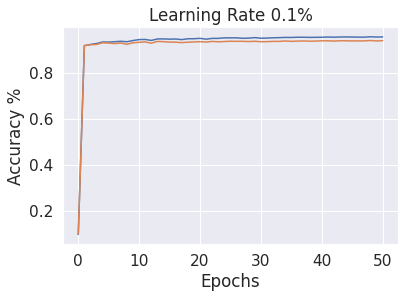

Accuracy: 93.6%


In [5]:
n.resize([input_size, 20, output_size])

wᵢ, wⱼ, accuracy = n.train(η=rate, α=momentum, target=target, epochs=epochs, initial_weight=initial_weight)

assert(wᵢ.shape == (784 + bias, 20))
assert(wⱼ.shape == (20 + bias, 10))
assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

Notice how the train method returns three objects:

- wᵢ: Weight matrix from the input layer to the hidden layer.
- wⱼ: Weight matrix from the hidden layer to the output layer
- accuracy: How accurate our model is

Why do I return the weights as shown above? Because this is our model! I am assuming after training,
this model will be packaged up some how and used in production to recognize images (I hope to do
this with the one I created).

One interesting thing I learned while debugging, is that the layers themselves are disposable.
You throw them basically away after each sample you train on.  It is the weights that persist and
need to be trained. These connections are the neural networks. For some reason, I imagined the
result of my neural network would include the layers themselves.

### Train with a hidden layer size of 50 nodes
Instead of having to create a new Neural Network object and reloading the training and testing data, we
can simply use the same object and call a resize method that I added. We use it here to resize the
hidden layer to 50 nodes.

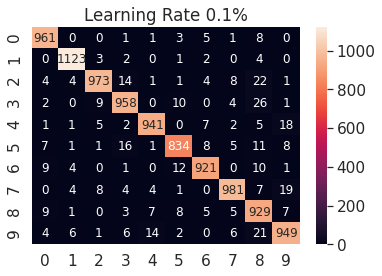

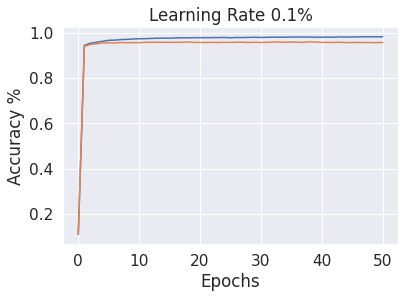

Accuracy: 95.7%


In [6]:
n.resize([input_size, 50, output_size])

wᵢ, wⱼ, accuracy = n.train(epochs=epochs)

assert(wᵢ.shape == (784 + bias, 50))
assert(wⱼ.shape == (50 + bias, 10))
assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

Note that removed most of the parameters to the train() method.
In this experiment, we are just varying the hidden layer size.  All of the
other parameters are set to the defaults.  I pass in epochs, because for testing purposes,
you may want to limit that.

### Train with a hidden layer size of 100 nodes
And the last part of experiment 1 is increasing our hidden layer to 100 nodes.

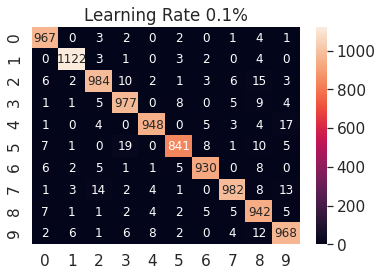

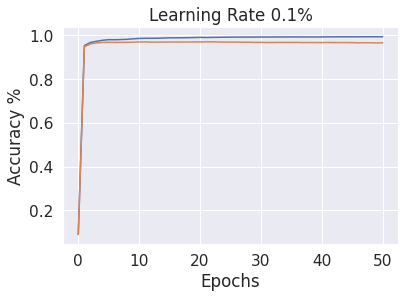

Accuracy: 96.6%


In [7]:
n.resize([input_size, 100, output_size])

wᵢ, wⱼ, accuracy = n.train(epochs=epochs)

assert(wᵢ.shape == (784 + bias, 100))
assert(wⱼ.shape == (100 + bias, 10))
assert(accuracy > .90)

print(f"Accuracy: {accuracy:.1%}")

# Experiment 3: Momentum

1. How does the momentum value affect the final accuracy on the test data?

    ***I got an accuracy of 97.6% with a momentum of 25%. This is the best result
    I got out of all the experiments.***

2. How does it affect the number of epochs needed for training to converge?

    ***Again, all of my experiments quickly converge after the first epoch,
    so I really don't see an effect.***

3. Again, is there evidence that any of your networks has overfit to the training data?  If so, what is that evidence?

    ***I don't see any evidence of overfitting.***


### Train with a momentum of .25
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

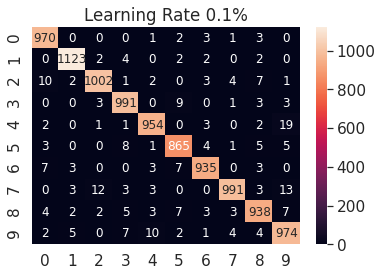

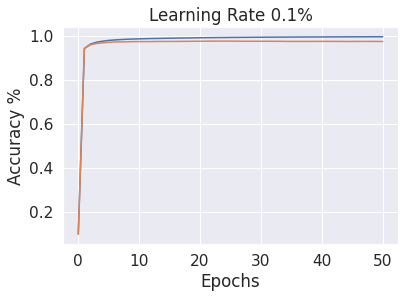

Accuracy: 97.4%


In [8]:
momentum = 0.25
wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a momentum of .5
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

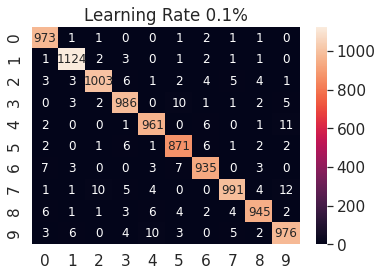

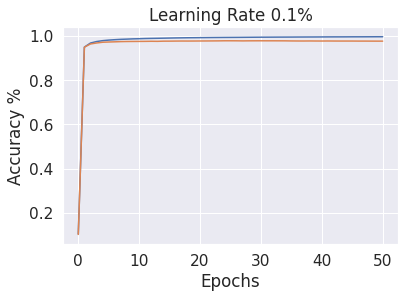

Accuracy: 97.7%


In [9]:
momentum = 0.5
wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a momentum of .95
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

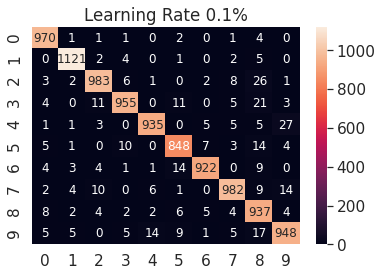

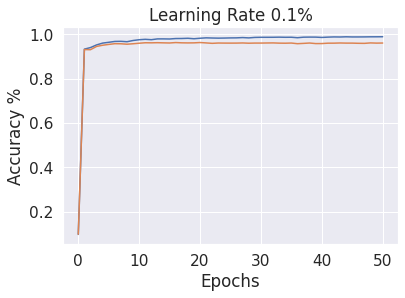

Accuracy: 96.0%


In [10]:
momentum = 0.95

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

# Experiment 2: Training Data Size

1. How does the size of the training data affect the final accuracy on the test data?

    ***blah***

2. How does it affect the number of epochs needed for training to converge?

    ***blah***

3. Again, is there evidence that any of your networks has overfit to the training data?  If so, what is that evidence?

    ***blah***

### Train with half the training data (30K samples)
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

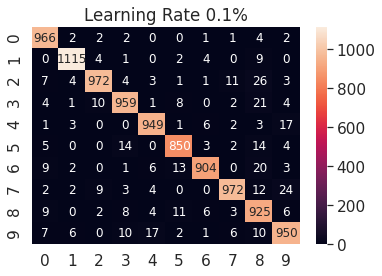

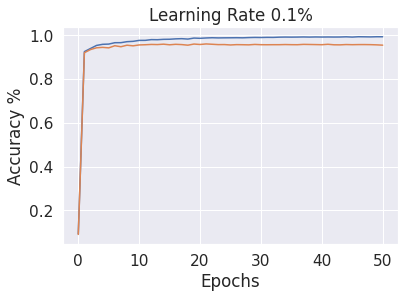

Accuracy: 95.6%


In [11]:
total_training_samples = len(n.train_labels)
training_size = 0.50
samples = int(total_training_samples * training_size)

n.train_labels = n.train_labels[:samples]
n.train_data = n.train_data[:samples]

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

### Train with a quarter of the training data (15K samples)
For clarity, I demonstrate how to resize the hidden layer, although it was already set to
20 during initialization.

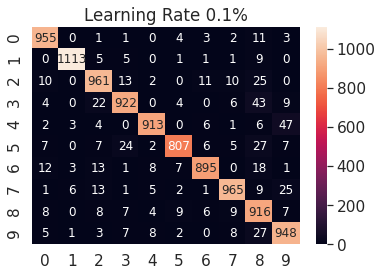

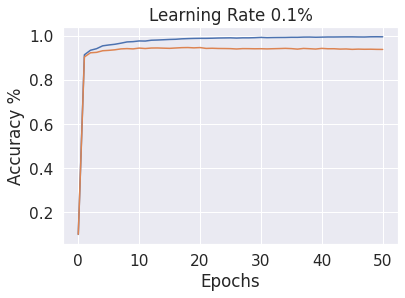

Accuracy: 94.0%


In [12]:
training_size = 0.25
samples = int(total_training_samples * training_size)

n.train_labels = n.train_labels[:samples]
n.train_data = n.train_data[:samples]

wᵢ, wⱼ, accuracy = n.train(α=momentum, epochs=epochs)

assert(accuracy > .90)
print(f"Accuracy: {accuracy:.1%}")

## Summary
The digits having the most issues being classified were 8, 5, and 2, all being mistaken for a 3.
The rest of the digits did quite well, especially 0, 1, 5, and 7.  That plots and confusions
matrices do not show any significant differrences between our three learning rates.

I noticed with all them that starting with the Epoch 0 the accuracy was very low (as expected).
It was less than 10%.  At Epoch 1, the accuracy jumps to ~85% and then over the next 49 epochs
we only get an improvement of 3%.  I am confused by this.  Also, I don't see any oscillations
here, so it appears that I am overfitting.